In [149]:
#importing the libraries for predicting profit for companies
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

In [150]:
#importing dataset
companies = pd.read_csv(r"C:\Users\G.SAI KRISHNA\Desktop\ML_Projects\profit_prediction\1000_Companies.csv")
#Independent var's
X = companies.iloc[:,:-1].values #fetch rows until second last column
#Dependent Var i.e. Profit
Y = companies.iloc[:,4].values

companies.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


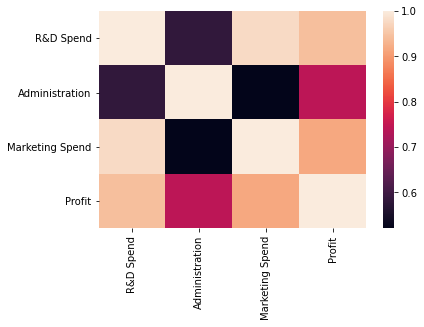

In [151]:
#Data visualization through Correlation Matrix
sns.heatmap(companies.corr())

In [152]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
#Encode Country Column
ct = ColumnTransformer([("State", OneHotEncoder(), [3])], remainder = 'passthrough')
X = ct.fit_transform(X)

X

array([[0.0, 0.0, 1.0, 165349.2, 136897.8, 471784.1],
       [1.0, 0.0, 0.0, 162597.7, 151377.59, 443898.53],
       [0.0, 1.0, 0.0, 153441.51, 101145.55, 407934.54],
       ...,
       [1.0, 0.0, 0.0, 100275.47, 241926.31, 227142.82],
       [1.0, 0.0, 0.0, 128456.23, 321652.14, 281692.32],
       [0.0, 0.0, 1.0, 161181.72, 270939.86, 295442.17]], dtype=object)

In [153]:
X=X[:,1:]
print(X)

[[0.0 1.0 165349.2 136897.8 471784.1]
 [0.0 0.0 162597.7 151377.59 443898.53]
 [1.0 0.0 153441.51 101145.55 407934.54]
 ...
 [0.0 0.0 100275.47 241926.31 227142.82]
 [0.0 0.0 128456.23 321652.14 281692.32]
 [0.0 1.0 161181.72 270939.86 295442.17]]


In [154]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

In [155]:
#fitting multiple linear regression model
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,Y_train)

LinearRegression()

In [156]:
Y_pred = regressor.predict(X_test)
print(Y_pred)

[ 89790.61532915  88427.07187361  94894.67836972 175680.86725611
  83411.73042088 110571.90200074 132145.22936439  91473.37719686
 164597.05380606  53222.82667401  66950.19050989 150566.43987005
 126915.20858596  59337.8597105  177513.91053062  75316.28143051
 118248.14406603 164574.40699902 170937.2898107  182069.11645084
 118845.03252689  85669.95112229 180992.59396144  84145.08220145
 105005.83769214 101233.56772747  53831.07669091  56881.41475224
  68896.39346905 210040.00765883 120778.72270894 111724.87157654
 101487.90541518 137959.02649624  63969.95996743 108857.91214126
 186014.72531988 171442.64130747 174644.26529205 117671.49128195
  96731.37857433 165452.25779409 107724.34331255  50194.54176913
 116513.89532179  58632.4898682  158416.4682761   78541.48521609
 159727.66671743 131137.87699644 184880.70924516 174609.0826688
  93745.66352059  78341.13383418 180745.9043908   84461.61490552
 142900.90602903 170618.44098397  84365.09530839 105307.3716218
 141660.07290787  52527.343

In [157]:
print(regressor.coef_)

[-8.80536598e+02 -6.98169073e+02  5.25845857e-01  8.44390881e-01
  1.07574255e-01]


In [158]:
print(regressor.intercept_)

-51035.22972402591


In [159]:
from sklearn.metrics import r2_score
r2_score(Y_test,Y_pred)

0.9112695892268863